In [1]:
# Load results
import os
import pandas as pd

results = pd.DataFrame()
results_path = "./results/generation/paraphrase_chat/"
result_file_list = os.listdir(results_path)
for filename in result_file_list:
    df = pd.read_csv(results_path + filename, names = ["filename", "turn", "full_summary", "omitted_summary", "similarity"])
    results = pd.concat([results, df])


In [2]:
# Cast dtype
results = results.astype({"similarity": float, "turn": int})

results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         952 non-null    object 
 1   turn             952 non-null    int64  
 2   full_summary     952 non-null    object 
 3   omitted_summary  952 non-null    object 
 4   similarity       952 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 44.6+ KB


In [3]:
# Remove duplicates
results = results.drop_duplicates(subset=["filename", "turn"], keep="last")

#print(results)

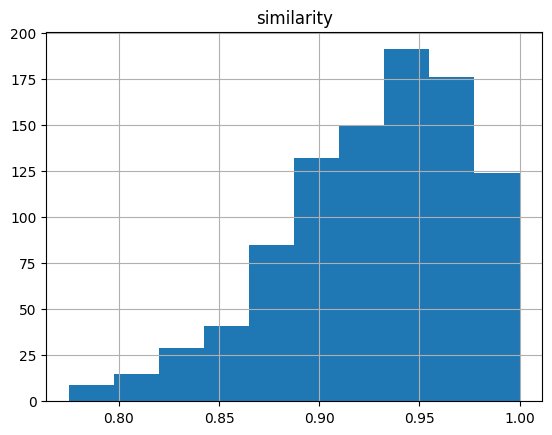

In [4]:
# Show histogram
import matplotlib

hist = results.hist(column="similarity")

In [5]:
# Sort by similarity
results = results.sort_values("similarity")
#results = results.reset_index()

#print(results)

In [6]:
# Show top and bottom
def show_row(row):
    with open("./dat/" + row.filename) as f:
        dialogue = [l.rstrip() for l in f.readlines()]
    
    full_dialogue = "\n".join(dialogue[:row.turn + 1])
    print("-----------------")
    print("full dialogue")
    print(full_dialogue)
    print("full summary")
    print(row.full_summary)
    print("omitted summary")
    print(row.omitted_summary)
    print("similarity") 
    print(row.similarity)
    return

NUM_EXAMPLES = 20
for row in results.head(NUM_EXAMPLES).itertuples():
    show_row(row)

for row in results.tail(NUM_EXAMPLES).itertuples():
    show_row(row)



-----------------
full dialogue
A: ねえ、ちょっと話、聞いてくれる？
B: どうしたの？
A: 彼氏がさあ、わたしの関西弁をすごく嫌がるんだよね。オバチャンみたいっていうの。
B: わたしは近畿に地方に住んでるから全然そんなこと思わないけどそれちょっとひどいね
A: ひどいよねー！でもさ、高卒で、しかも気分屋のわたしと付き合ってくれる男性なんて、そうそういないしなあ。
B: 関係ないと思うけどな。わたしは大卒だけど同級生は高卒の子と結婚したよ。とりあえず元気出して！
A: ありがとう！あ！そういえば、もっと酷いことを言われたの思い出しちゃった！
B: さらに！？
A: デートで、茶色の髪の毛に合わせて、ヒョウ柄のタンクトップ着ていったら、おまえは女豹かってツッコまれた。
B: うーん、、それはフォローできないかなー。でもツッコミができる彼は悪くないんじゃない？
A: そう？そうかな？わたしたちカップルって、これからもうまくやっていけると思う？
B: 意外にお似合いなのかもね！
full summary
あなたたちはお互いをよく理解し、お互いを尊重しているから、きっとうまくやっていけると思うよ。
omitted summary
茶色の髪の毛に合わせたヒョウ柄のタンクトップが似合っているかもね！
similarity
0.7748776384123496
-----------------
full dialogue
A: こんにちは。最近はどんなことをされてますか？
B: 最近は新卒で入社した今の会社で働き詰めです。おかげでいつも寝不足ですよ。あなたは？
A: 勤め人は大変だね。わたしは、何度も転職した結果、自由気ままなフリーランスが性に合ってるってことが分かったよ。
B: フリーランスかあ。かっこいいなあ。わたしは我慢強いのだけが取り柄だから今の会社でもう少し頑張ろうと思ってるよ。
A: えらいなあ。わたしの場合は、敵を作るタイプなんだよねー。原因は多分、わたしにあるんだろうけど。。。
B: そんなにきつい性格だったかな？
A: んー、性格っていうか、リーダーシップを取るのが、自分では得意だと思ってるんだけど、大学中退のくせに偉そうにしてって感じる人も多いみたい。
B: ひがみだね。でもそういう人ってどこにでもいるんだよね。性に合う

0. A: こんにちは！元気にしていましたか？
1. B: はい！自衛官ですから！元気だけは自信があります。あなたは元気にしてましたか？
2. A: はい！私も吹奏楽部員なので肺活量には自信があります！自衛官って体を鍛えたり、やっぱり大変ですか？
3. B: 吹奏楽部いいですね〜！自衛官は大変なこともありますが、ガッツで乗り切ってますよ！元応援団なもので！
4. A: そうだったんですね！どうりでお声が通ると思いました。わたしもいつかメイクアップアーティストになりたいんですが、あなたのようにいきいきと働けたらいいなと思います。
5. B: メイクアップアーティストですか！あなたならきっとなれる！
6. A: あなたの応援があれば叶う気がします！いつか夢が叶ったら、世界中を飛び回ってみたいんです！あなたにも今、叶えたいこととかありますか？
7. B: そうですね。今はとにかく目の前の仕事を責任持ってこなしたいですね。
8. A: 責任を持ってお仕事をするって、大切なことですよね。尊敬します！まだ10代ですが、将来はあなたのように責任感のある大人になりたいです！
9. B: 10代ですか！今のうちにたくさんの経験をして素敵な大人になってくださいね！
10. A: はい！たくさんいる友達にもあなたとの今日のことを話して、皆で夢に向かって頑張ろうと思います！
11. B: 応援します！フレーフレー！


<Axes: xlabel='turn'>

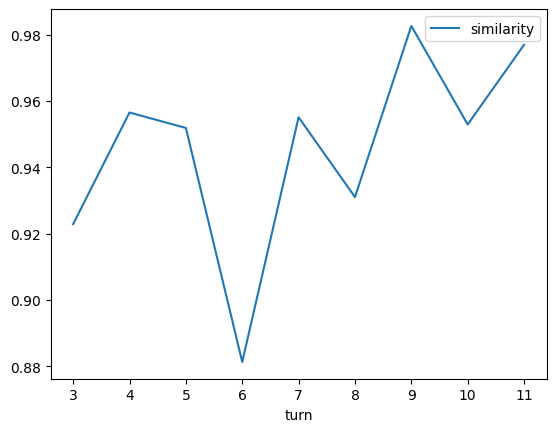

In [7]:
# Show graph
import matplotlib.pyplot as plt
DIALOGUE_NUMBER = 98

result = results.query(f"filename == 'PP{DIALOGUE_NUMBER}.txt'")
result = result.sort_values("turn", ascending=True)

with open(f"./dat/PP{DIALOGUE_NUMBER}.txt") as f:
    dialogue = [l.rstrip() for l in f.readlines()]

dialogue_with_line_number = []
for idx, l in enumerate(dialogue):
    dialogue_with_line_number.append(str(idx) + ". " + l)

print("\n".join(dialogue_with_line_number))
result.plot(x="turn", y="similarity")

In [53]:
# Count number of sentences similarity < 0.9
threshold = 0.85
under_threshold = results["similarity"] < threshold
n_under_threshold = under_threshold.sum()
print(n_under_threshold)
results_under_threshold = results[under_threshold]
bottom_results = results_under_threshold.reset_index()

65


In [54]:
# Collect top samples with the same number as under threshold
top_results = results.tail(n_under_threshold)
top_results = top_results.reset_index()
top_threshold = top_results["similarity"].min()
print(top_threshold)

0.9897329897748932


In [55]:
# Create samples for survey
n_sample = 10
sample_size_low = 5
sample_size_high = 5

samples = []
for i in range(n_sample):
    sample = pd.DataFrame(columns=bottom_results.columns)
    n_rows = 0
    while n_rows < sample_size_low:
        low_candidate = bottom_results.sample(n=1)
        low_candidate["condition"] = "low"
        sample = pd.concat([sample, low_candidate])
        sample = sample.drop_duplicates(keep="first", subset="filename")
        n_rows = len(sample)
    bottom_results.drop(sample.head(sample_size_low).index, inplace=True)

    while n_rows < sample_size_low + sample_size_high:
        high_candidate = top_results.sample(n=1)
        high_candidate["condition"] = "high"
        sample = pd.concat([sample, high_candidate])
        sample = sample.drop_duplicates(keep="first", subset="filename")
        n_rows = len(sample)
    top_results.drop(sample.tail(sample_size_high).index, inplace=True)

    # Check filename
    print(sample["filename"])    
    samples.append(sample)


21    PP40.txt
28    PP65.txt
14    PP23.txt
53    PP90.txt
54    PP99.txt
17    PP66.txt
56    PP97.txt
34    PP50.txt
27     PP7.txt
5     PP80.txt
Name: filename, dtype: object
58    PP90.txt
1     PP59.txt
9     PP45.txt
60    PP42.txt
19    PP96.txt
7     PP48.txt
23    PP84.txt
35    PP94.txt
49    PP43.txt
57    PP23.txt
Name: filename, dtype: object
25    PP38.txt
38    PP40.txt
17    PP51.txt
16    PP31.txt
63    PP44.txt
41    PP19.txt
10    PP49.txt
4     PP16.txt
32    PP18.txt
43    PP83.txt
Name: filename, dtype: object
22    PP60.txt
3     PP11.txt
61    PP58.txt
43    PP33.txt
6     PP29.txt
0     PP85.txt
53    PP90.txt
37    PP18.txt
51    PP61.txt
24    PP55.txt
Name: filename, dtype: object
56    PP39.txt
39    PP73.txt
37    PP22.txt
20    PP60.txt
48    PP91.txt
16    PP46.txt
12    PP33.txt
18    PP53.txt
48    PP93.txt
11    PP19.txt
Name: filename, dtype: object
5     PP29.txt
44    PP70.txt
59    PP40.txt
50    PP78.txt
40     PP7.txt
15    PP35.txt
9     PP27

In [56]:
# Create CSV
import csv

SPEAKERS = ["A: ", "B: "]

for idx, sample in enumerate(samples):
    shuffled_sample = sample.sample(frac=1)
    sample_CSV = pd.DataFrame({
        "full_dialogue": [],
        "omitted_dialogue": [],
        "core_sentence": [],
        "condition": []
        })
    for row in shuffled_sample.itertuples():
        with open("./dat/" + row.filename) as f:
            dialogue = [l.rstrip() for l in f.readlines()]
        
        full_dialogue = "\n\n".join(dialogue[:row.turn + 1])
        omitted_dialogue = "\n\n".join(dialogue[:row.turn - 2] + dialogue[row.turn:row.turn + 1])
        core_sentence = dialogue[row.turn]
        for speaker in SPEAKERS:
            core_sentence = core_sentence.removeprefix(speaker)
        condition = row.condition
        sample_CSV = pd.concat([sample_CSV, pd.DataFrame({
        "full_dialogue": [full_dialogue],
        "omitted_dialogue": [omitted_dialogue],
        "core_sentence": [core_sentence],
        "condition": [condition]
        })])

    csv_filename = "./forms/sample{:03}.csv".format(idx + 1)
    sample_CSV.to_csv(csv_filename)



In [1]:
# Create tex
import pandas as pd
n_samples = 10

for survey_idx in range(n_samples):

    SURVEY_NUMBER = survey_idx + 1
    csv_filename = "./forms/sample{:03}.csv".format(SURVEY_NUMBER)
    sample_CSV = pd.read_csv(csv_filename)

    head_path = "./tex/head.tex"
    with open(head_path) as head_file:
        head_tex = head_file.read()
    tail_path = "./tex/tail.tex"
    with open(tail_path) as tail_file:
        tail_tex = tail_file.read()

    for idx, row in enumerate(sample_CSV.itertuples()):
        underlined_core_sentence = "\\ul{" + row.core_sentence + "}"
        underlined_full = row.full_dialogue.replace(row.core_sentence, underlined_core_sentence)
        full_path = "./forms/" + str(SURVEY_NUMBER).zfill(3) + "_" + str(idx).zfill(3) + "full.tex"
        with open(full_path, mode='w') as output_file:
            output_file.write(head_tex)
            output_file.write(underlined_full)
            output_file.write(tail_tex)

        full_name = "forms/" + str(SURVEY_NUMBER).zfill(3) + "_" + str(idx).zfill(3) + "full"
        !ptex2pdf -l {full_name} -output-directory "forms/"


        underlined_omitted = row.omitted_dialogue.replace(row.core_sentence, underlined_core_sentence)
        omitted_path = "./forms/" + str(SURVEY_NUMBER).zfill(3) + "_" + str(idx).zfill(3) + "omitted.tex"
        with open(omitted_path, mode='w') as output_file:
            output_file.write(head_tex)
            output_file.write(underlined_omitted)
            output_file.write(tail_tex)

        omitted_name = "forms/" + str(SURVEY_NUMBER).zfill(3) + "_" + str(idx).zfill(3) + "omitted"
        !ptex2pdf -l {omitted_name} -output-directory "forms/"


This is ptex2pdf[.lua] version 20200520.0.
Processing forms/010_000full
This is e-pTeX, Version 3.141592653-p4.1.0-230214-2.6 (utf8.euc) (TeX Live 2023) (preloaded format=platex)
 restricted \write18 enabled.
entering extended mode
(./forms/010_000full.tex(guessed encoding #3: UTF-8 = utf8)
pLaTeX2e <2023-02-14>+1 (based on LaTeX2e <2022-11-01> patch level 1)
L3 programming layer <2023-04-20>
(/usr/local/texlive/2023/texmf-dist/tex/latex/amscls/amsart.cls(guessed encoding #5: ASCII = utf8)
Document Class: amsart 2020/05/29 v2.20.6
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty(guessed encoding #6: ASCII = utf8)
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty(guessed encoding #7: ASCII = utf8)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty(guessed encoding #8: ASCII = utf8)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty(guessed encoding #7: ASCII = utf8))